# G2M insight for Cab Investment firm
---

In [113]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

#### Review the datasets and create master data

- <b>Cab_Data.csv</b> – this file includes details of transaction for 2 cab companies

In [114]:
df_cab = pd.read_csv("D:/DataSets/Cab_Data.csv")

print(f"df shape: {df_cab.shape} \n")
df_cab.head()

df shape: (359392, 7) 



,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [115]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [116]:
# The date of travel is in Excel serial date format. Change it to date
df_cab['Date of Travel'] = df_cab['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [117]:
# Add detailed coulmns for the year and the month for further analysis
df_cab['Year of Travel']=pd.DatetimeIndex(df_cab['Date of Travel']).year
df_cab['Month of Travel']=pd.DatetimeIndex(df_cab['Date of Travel']).month
df_cab['Day of Travel']=pd.DatetimeIndex(df_cab['Date of Travel']).day_name()
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Day of Travel
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,Friday
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,Wednesday
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,Saturday
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1,Thursday
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1,Sunday


In [118]:
# Add a new column to calculate the profit of each ride
df_cab['Profit']= df_cab['Price Charged']-df_cab['Cost of Trip']
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Day of Travel,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,Friday,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,Wednesday,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,Saturday,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1,Thursday,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1,Sunday,16.844


In [119]:
df_cab.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,2017.045199,7.500434,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,0.800239,3.445095,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,2016.000000,1.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,2016.000000,5.000000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,2017.000000,8.000000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,2018.000000,10.000000,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,2018.000000,12.000000,1463.966000


In [120]:
# The number of transaction for each company
df_cab.groupby(["Company"]).count()

,Transaction ID,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Day of Travel,Profit
Company,,,,,,,,,,
Pink Cab,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711
Yellow Cab,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681


- <b>Customer_ID.csv</b> – this is a mapping table that contains a unique identifier which links the customer’s demographic details

In [121]:
customer_df = pd.read_csv("D:/DataSets/Customer_ID.csv")

print(f"df shape: {customer_df.shape} \n")
customer_df.head()

df shape: (49171, 4) 



,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [122]:
# Add a new column to categorize the age to groups
label= ["{0} - {1}".format(i, i + 9) for i in range(10, 70, 10)]
customer_df["Age group"] = pd.cut(customer_df["Age"], range(10,75, 10), right=False, labels=label)
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month),Age group
0,29290,Male,28,10813,20 - 29
1,27703,Male,27,9237,20 - 29
2,28712,Male,53,11242,50 - 59
3,28020,Male,23,23327,20 - 29
4,27182,Male,33,8536,30 - 39


In [123]:
customer_df.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [124]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer ID         49171 non-null  int64   
 1   Gender              49171 non-null  object  
 2   Age                 49171 non-null  int64   
 3   Income (USD/Month)  49171 non-null  int64   
 4   Age group           49171 non-null  category
dtypes: category(1), int64(3), object(1)
memory usage: 1.5+ MB


- <b>Transaction_ID.csv</b> –  this is a mapping table that contains transaction to customer mapping and payment mode

In [125]:
transaction_df = pd.read_csv("D:/DataSets/Transaction_ID.csv")

print(f"df shape: {transaction_df.shape} \n")
transaction_df.head()

df shape: (440098, 3) 



,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [126]:
transaction_df.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [127]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


- <b>City.csv</b> – this file contains list of US cities, their population and number of cab users

In [128]:
city_df = pd.read_csv("D:/DataSets/City.csv")

print(f"df shape: {city_df.shape} \n")
city_df.head()

df shape: (20, 3) 



,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [129]:
city_df.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [130]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [131]:
# Change the data type to numeric
city_df['Users']=city_df['Users'].replace(',', '', regex=True).astype(int)
city_df['Population']=city_df['Population'].replace(',', '', regex=True).astype(int)
city_df.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [132]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 448.0+ bytes


### Master Data

In [133]:
# Join the data sets into a master data
df_master = pd.merge(df_cab, transaction_df, on=["Transaction ID"]) # join the cab_data and the transaction_data
df_master = pd.merge(df_master, customer_df, on=["Customer ID"])  # add the customer_data
df_master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Day of Travel,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Age group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,Friday,57.3150,29290,Card,Male,28,10813,20 - 29
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,7,Saturday,281.2772,29290,Cash,Male,28,10813,20 - 29
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,11,Friday,194.6480,29290,Card,Male,28,10813,20 - 29
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,Wednesday,23.6660,27703,Card,Male,27,9237,20 - 29
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,4,Saturday,253.9808,27703,Card,Male,27,9237,20 - 29


In [134]:
print(f"df shape: {df_master.shape} \n")
df_master.info()

df shape: (359392, 17) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Year of Travel      359392 non-null  int64         
 8   Month of Travel     359392 non-null  int64         
 9   Day of Travel       359392 non-null  object        
 10  Profit              359392 non-null  float64       
 11  Customer ID         359392 non-null  int64         
 12  Payment_Mode        359392 non-null  object        
 13  Gend

In [135]:
# Check for duplicates
df_master[df_master.duplicated()]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Day of Travel,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Age group


---

# Data Visualization
---

In [136]:
# Assigning Colors for visualization
palette = ['#BD51AD', '#C4C35A']

- Customer base Analysis

Text(0.5, 1.0, 'Users per Company')

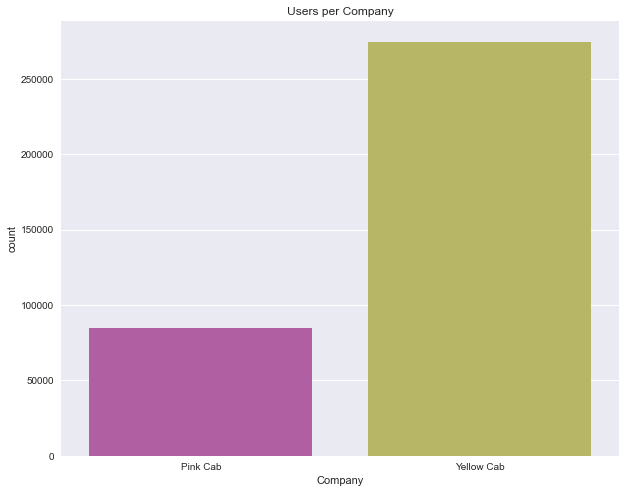

In [137]:
# Users per Company
plt.figure(figsize=(10,8))
sns.countplot(x= 'Company', data = df_master, palette=palette)
plt.title("Users per Company")

Yellow cab have mor useres than the Pink cab

Text(0.5, 1.0, 'Users per City:')

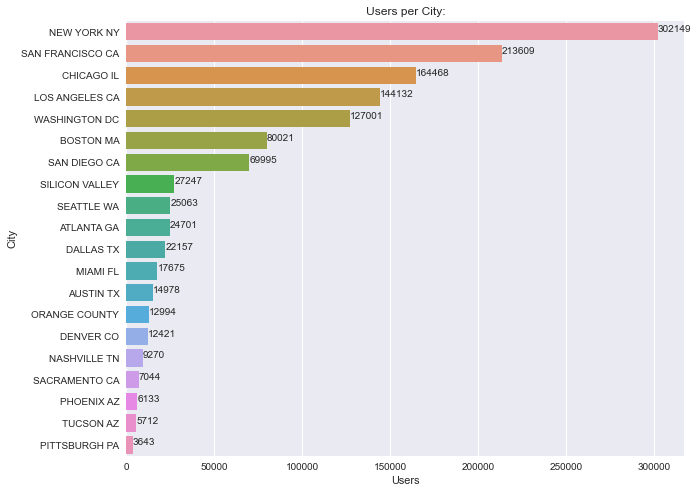

In [138]:
# Users per City
users_per_city=pd.DataFrame(city_df.groupby("City")["Users"].sum().sort_values(ascending=False))
users_per_city.reset_index(inplace=True)

plt.figure(figsize=(10,8));
graph=sns.barplot(x="Users", y="City", data=users_per_city);
for i, v in enumerate(users_per_city.Users):
    graph.text(v, i, str(int(v)))
plt.title('Users per City:')

NY has the most users followed by SF and Chicago

Text(0.5, 1.0, 'Customers by Gender')

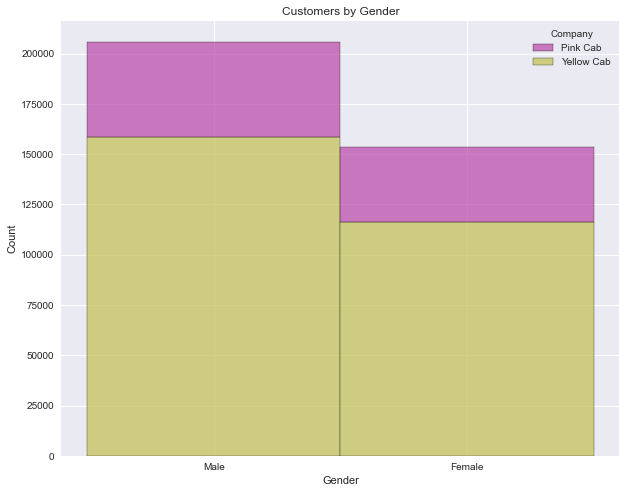

In [139]:
# Customers per Genger
plt.figure(figsize=(10,8))
sns.histplot(
    df_master,
    x="Gender",
    hue="Company", 
    palette = palette,
    multiple="stack",    
)
plt.title("Customers by Gender")

There's more male customers

Text(0.5, 1.0, 'Customers per Age group')

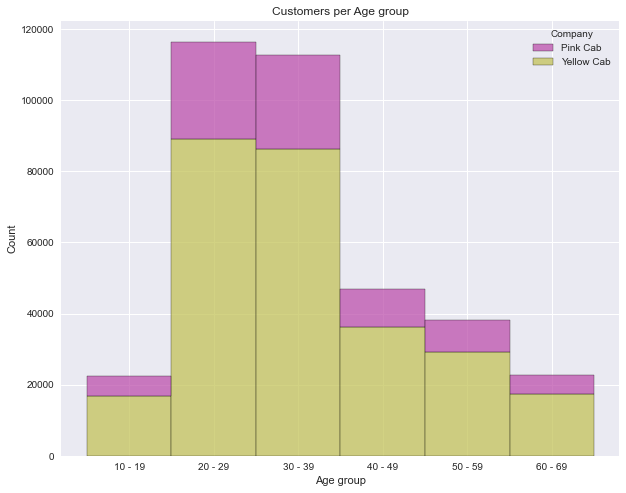

In [140]:
# Customers per Genger
plt.figure(figsize=(10,8))
sns.histplot(
    df_master,
    x="Age group",
    hue="Company", 
    palette = palette,
    multiple="stack"   
)
plt.title("Customers per Age group")

Most customers are between the age of 20-39

Text(0.5, 1.0, 'Users income')

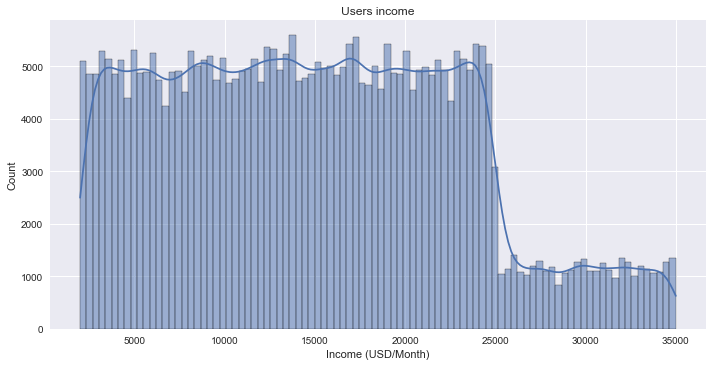

In [141]:
# Users income
sns.displot(data=df_master, x='Income (USD/Month)', kde=True ,aspect=2)
plt.title("Users income")

Text(0.5, 1.0, 'Payment Mode by Users')

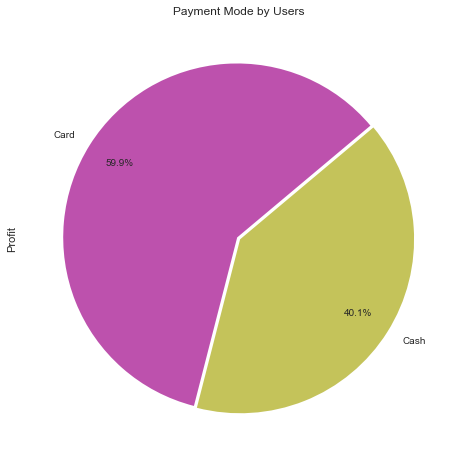

In [142]:
# Payment Mode by Users
df_master.groupby('Payment_Mode')['Profit'].sum().plot(kind='pie',y='Payment_Mode',
startangle=40,figsize=(10,8),autopct='%1.1f%%',explode=[0.01]*2,pctdistance=0.8, colors= palette)
plt.title('Payment Mode by Users')

59.9% of hte users use cards as a payment method

-  Profit Analysis

In [143]:
# Total Profit for both companies
round(df_master.groupby(['Company']).Profit.sum().to_frame('Total Profit'),0)

,Total Profit
Company,
Pink Cab,5307328.0
Yellow Cab,44020373.0


In [144]:
# Profit per year
df_master.groupby(['Company','Year of Travel']).Profit.sum()

Company     Year of Travel
Pink Cab    2016              1.713511e+06
            2017              2.033655e+06
            2018              1.560162e+06
Yellow Cab  2016              1.392700e+07
            2017              1.657598e+07
            2018              1.351740e+07
Name: Profit, dtype: float64

Text(0.5, 1.0, ' Profit Per Year')

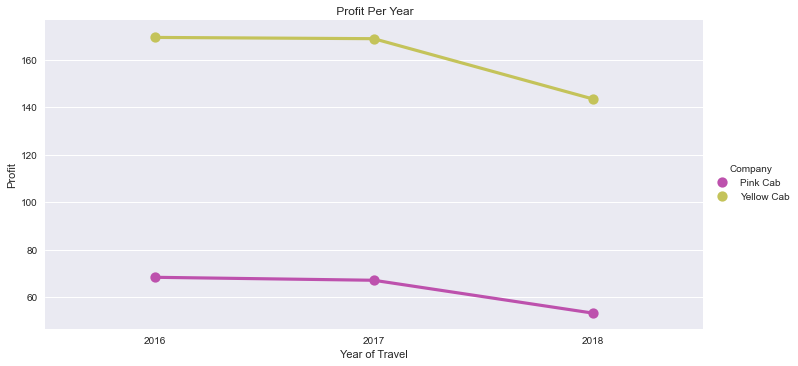

In [145]:
# Yearly profit per company
sns.catplot(x="Year of Travel",
            y='Profit',
            hue="Company",
            kind="point", 
            aspect= 2,
            palette=palette,
            data=df_master)
plt.title(" Profit Per Year")

both companies has a better profit in the year 2017

Text(0.5, 1.0, ' Profit Per Month')

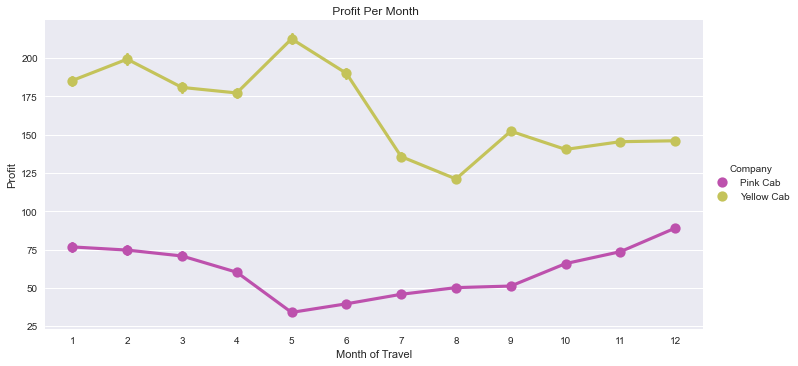

In [146]:
# Monthly profit per company
sns.catplot(x="Month of Travel",
            y='Profit',
            hue="Company",
            kind="point", 
            aspect= 2,
            palette=palette,
            data=df_master)
plt.title(" Profit Per Month")

Text(0.5, 1.0, ' Profit Per City')

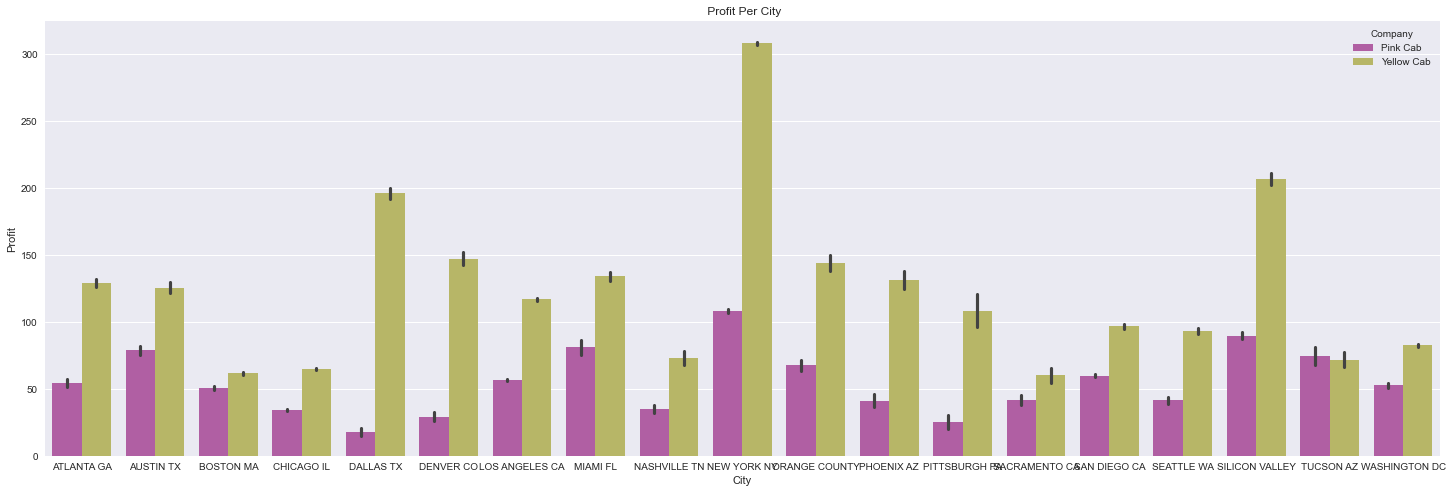

In [147]:
# Profit per city for each company
plt.figure(figsize=(25,8))
sns.barplot(x ='City', y='Profit', hue='Company',data=df_master, palette= palette)
plt.title(" Profit Per City")

NY is the most profiting city and even though Dalas in the top third for the Yellow cab it's not the same for Pink cab

Text(0.5, 1.0, ' Price Charged Per Year')

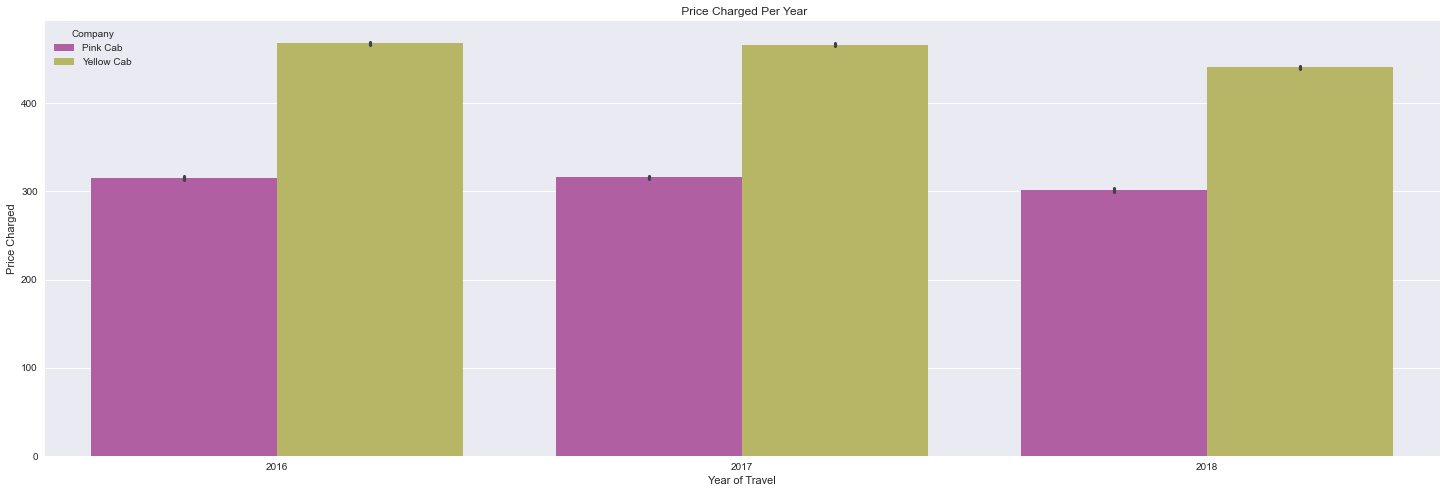

In [148]:
# Price charged diffrence between Price Charged in the two companies
plt.figure(figsize=(25,8))
sns.barplot(x ='Year of Travel', y='Price Charged', hue='Company',data=df_master, palette= palette)
plt.title(" Price Charged Per Year")

The Yellow cab charge more 

Text(0.5, 1.0, 'profits per KM')

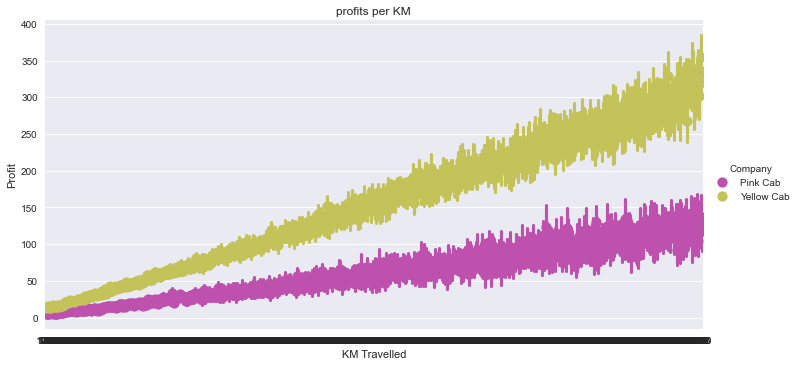

In [149]:
# Profits per KM
sns.catplot(x="KM Travelled",
            y='Profit',
            hue="Company",
            kind="point", 
            aspect= 2,
            palette=palette,
            data=df_master)
plt.title("profits per KM")


- Seasonality Daywise

In [150]:
# Calculate no of trips per day
trips = df_master.groupby(['Day of Travel', 'Company']).size().reset_index().rename(columns = {0 : 'No. of Trips'})
trips.head()

,Day of Travel,Company,No. of Trips
0,Friday,Pink Cab,19249
1,Friday,Yellow Cab,62153
2,Monday,Pink Cab,7032
3,Monday,Yellow Cab,22705
4,Saturday,Pink Cab,18253


Text(0.5, 1.0, 'Monthly Trips')

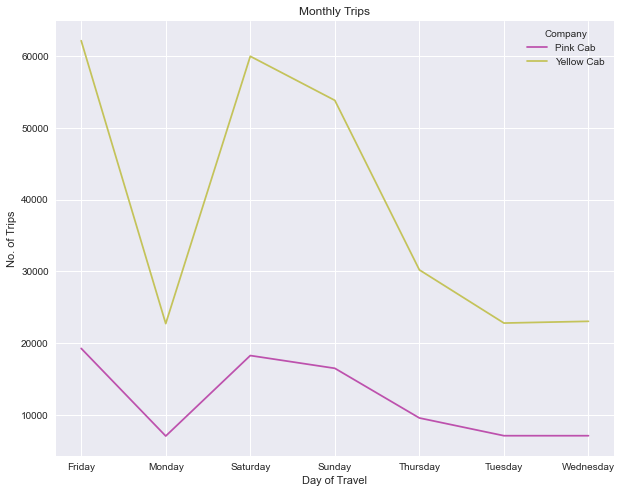

In [151]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Day of Travel', y = 'No. of Trips', data = trips, hue = 'Company', palette = palette);
plt.title('Monthly Trips')

Weekend has more trips than the rest of the week

## Conclusion
The Yellow cab has more reach to the customers age and other wise & and it recorded higher profit than the Pink cab  